# Titanic Data Analysis By Gangadhara Naga Sai

## Overview Of Titanic Dataset
   In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its    passengers and crew. In this project, we will explore the RMS Titanic passenger manifest to determine whether someone survived or did not survive.Demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic Dataset is obtained from kaggle (https://www.kaggle.com/c/titanic/data).



## Questions

*  Depending upon weather the passengers survived or did not survive based on the classification of
  * Age
  * Gender
  * Passenger class
  
  Shows difference in survival chances of Each indiviudal?


## Data Wrangling 

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

%matplotlib inline

# Load the dataset
files = 'titanic_data.csv'
data_titanic = pd.read_csv(files)
display(data_titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Description
From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Variable Notes

pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


In [2]:

data =data_titanic

# Show the dataset 
display(data.head())
data.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From the above info(),We can see columns Age, Cabin and Embarked have missing values.

Handling the missing values:
   >Ignore the rows with missing data,
   
   >Exclude the variable at all or we might substite it with  mean or median.
    
 Age  80% of the data is available,which seems a important variable so not to exclude.
 
 Port of embarkation doesn't seem interesting.
 
 cabin 23% of the data so decided to exclude.
 
 PassengerId,Name,fare doesnt seem to contribute to any survival investigation


In [3]:
#exculding some coloumns
del data['Ticket']
del data['Cabin']
del data['Embarked']
del data['Name']
del data['PassengerId']
del data['Fare']


In [4]:
data.describe(include='all')

C:\Users\SAI\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891,714.000000,891.000000,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN
freq,NaN,NaN,577,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000
25%,0.000000,2.000000,NaN,NaN,0.000000,0.000000
50%,0.000000,3.000000,NaN,NaN,0.000000,0.000000
75%,1.000000,3.000000,NaN,NaN,1.000000,0.000000


In [5]:
# Calculate number of missing values
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [6]:
null_female = data[pd.isnull(data['Age'])]['Sex'] == 'female'
null_male = data[pd.isnull(data['Age'])]['Sex'] == 'male'

print "Total missing age for female:",null_female.sum()

print "Total missing age for male:",null_male.sum()

Total missing age for female: 53
Total missing age for male: 124


lets decide should we remove missing age rows or fill the missing values with the mean, I'm going first to split the sample data into 2 samples  with missing age and with age and perform a t test 


In [7]:
notnull_age = data[pd.notnull(data['Age'])]
null_age = data[pd.isnull(data['Age'])]

Hypothesis

To fill the missing data with mean, i will decide with t test by being sure that passengers in these 2 samples are likely to have the similar survival rate.

- H0:means of the samples populatins are equal 
- H1: population means are different

If the resulted p value is going to be less than the critical value (with alpha level 0.05),
I should reject the null hypothesis and conclude that population means are different not by chance
(Ignoring the data of missing data which almost 20% of the data should be neglected).

I'm using the existing in scipy.stats function to perform t test for independent variables:


In [8]:
from scipy.stats import ttest_ind
ttest_ind(notnull_age['Survived'], null_age['Survived'])


Ttest_indResult(statistic=2.7606993230995345, pvalue=0.0058865348400755626)

p value is than 0.05 which results in rejecting H0 ,so there is a significant difference in mean .So, I'm going to substitute the missing values with the mean age.

In [9]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891,891.000000,891.000000,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN
freq,NaN,NaN,577,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594
std,0.486592,0.836071,NaN,13.002015,1.102743,0.806057
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000
50%,0.000000,3.000000,NaN,29.699118,0.000000,0.000000
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000


We can see that all columns have identical length.



## Data Exploration and Visualization

In [10]:
data_s=data
survival_group = data_s.groupby('Survived')
survival_group.describe()

Age       Parch      Pclass       SibSp
Survived                                                      
0        count  549.000000  549.000000  549.000000  549.000000
         mean    30.415100    0.329690    2.531876    0.553734
         std     12.457370    0.823166    0.735805    1.288399
         min      1.000000    0.000000    1.000000    0.000000
         25%     23.000000    0.000000    2.000000    0.000000
         50%     29.699118    0.000000    3.000000    0.000000
         75%     35.000000    0.000000    3.000000    1.000000
         max     74.000000    6.000000    3.000000    8.000000
1        count  342.000000  342.000000  342.000000  342.000000
         mean    28.549778    0.464912    1.950292    0.473684
         std     13.772498    0.771712    0.863321    0.708688
         min      0.420000    0.000000    1.000000    0.000000
         25%     21.000000    0.000000    1.000000    0.000000
         50%     29.699118    0.000000    2.000000    0.000000
         75%     35.000000    1.000000    3.000000    1.000000
         max     80.000000    5.000000    3.000000    4.000000

From the above statistics
- Youngest to survive: 0.42 
- Youngest to die: 1.0 
- Oldest to survive: 80.0 
- Oldest to die: 74.0




In [11]:
#  Seriously i dont understand why age is 0.42
data_s[data_s['Age'] < 1]

,Survived,Pclass,Sex,Age,SibSp,Parch
78,1,2,male,0.83,0,2
305,1,1,male,0.92,1,2
469,1,3,female,0.75,2,1
644,1,3,female,0.75,2,1
755,1,2,male,0.67,1,1
803,1,3,male,0.42,0,1
831,1,2,male,0.83,1,1


These must be new borns and all survived

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all graphs
#sns.set_style("light")
#sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [39]:
# sns.factorplot('Age', 'Sex' ,hue = 'Survived', data = data, kind = 'bar')
# sns.factorplot('Pclass','Survived', data = data, kind = 'bar')
# sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data, kind = 'bar')



Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

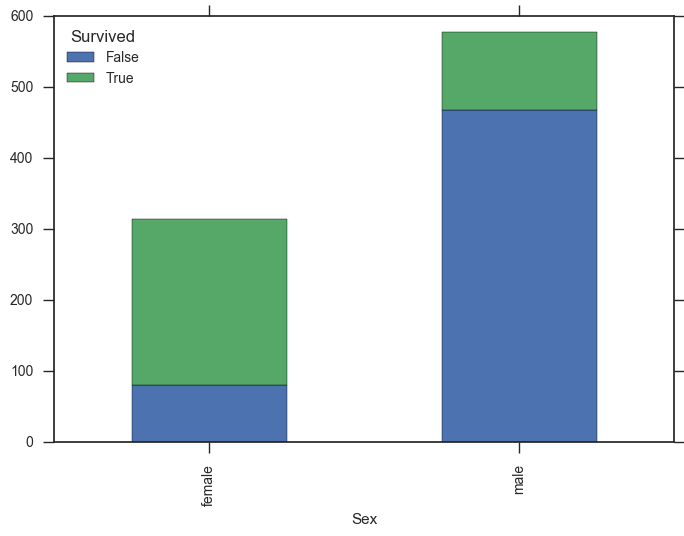

In [26]:
## GENDER
survivals = pd.crosstab([ data_s.Sex], data_s.Survived.astype(bool))
survivals.plot(kind='bar', stacked=True)

survival = data_s.groupby('Sex')['Survived']
survival.mean()

From the above plot we can see that gender played an important role in survival of each
individaul

Female Survival rate : 74.2%

Male Survival rate: 18.8%

               Survived        Age     SibSp     Parch
Sex    Pclass                                         
female 1       0.968085  34.141405  0.553191  0.457447
       2       0.921053  28.748661  0.486842  0.605263
       3       0.500000  24.068493  0.895833  0.798611
male   1       0.368852  39.287717  0.311475  0.278689
       2       0.157407  30.653908  0.342593  0.222222
       3       0.135447  27.372153  0.498559  0.224784


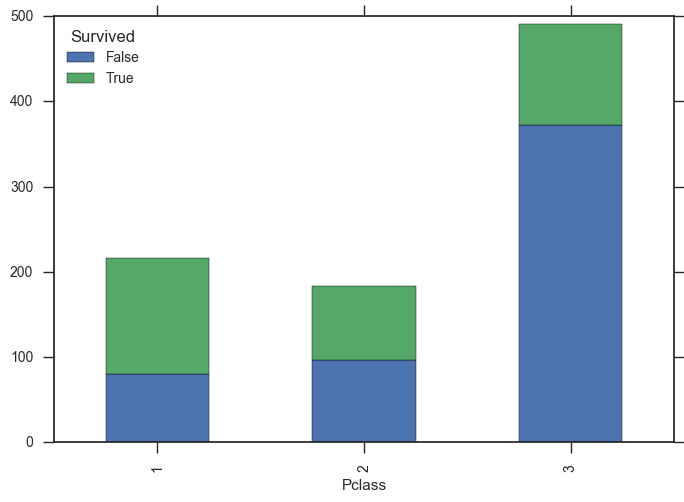

In [30]:
#PCLASS

survivals = pd.crosstab([data_s.Pclass], data_s.Survived.astype(bool))
survivals.plot(kind='bar', stacked=True)

survival=data.groupby(['Pclass'])
survival.mean()


 **A passenger from Class 1 is about 2.5x times more likely to survive than a passenger in Class 3.** 

Social-economic standing was a factor in survival rate of passengers.

- Class 1: **62.96%**
- Class 2: **47.28%**
- Class 3: **24.24%**

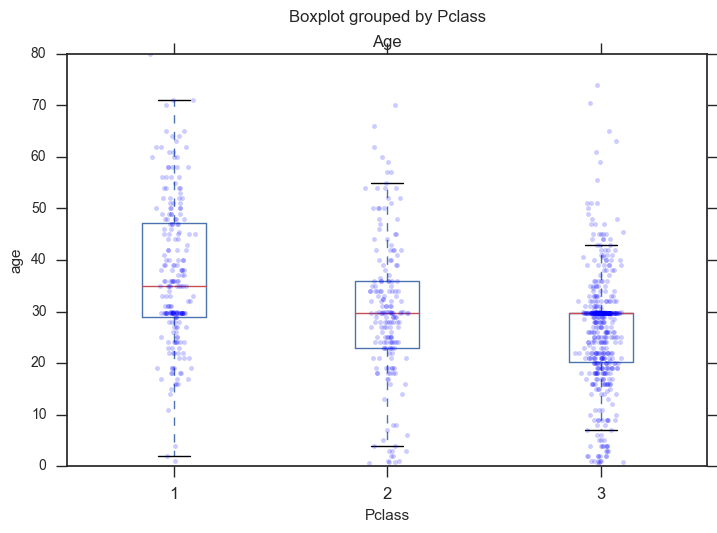

In [67]:
bp = data.boxplot(column='Age', by='Pclass', grid=False)
for i in [1,2,3]:
    y =data.Age[data.Pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'b.', alpha=0.2)
plt.ylabel("age")    

From the above plot  we can clearly see individuals of different class distibuted for various ages. And the red line shows the average of age for each class


Survived        Age     SibSp     Parch
Sex    Pclass                                         
female 1       0.968085  34.141405  0.553191  0.457447
       2       0.921053  28.748661  0.486842  0.605263
       3       0.500000  24.068493  0.895833  0.798611
male   1       0.368852  39.287717  0.311475  0.278689
       2       0.157407  30.653908  0.342593  0.222222
       3       0.135447  27.372153  0.498559  0.224784

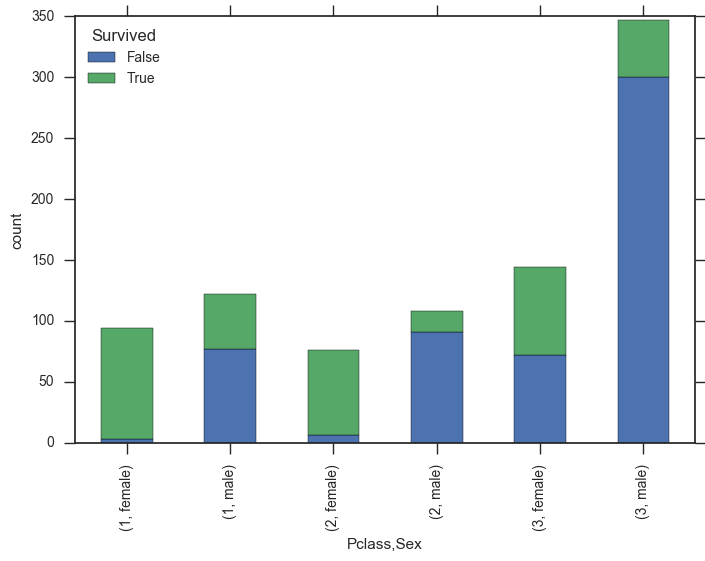

In [64]:
survivals = pd.crosstab([data_s.Pclass, data_s.Sex], data_s.Survived.astype(bool))
survivals.plot(kind='bar', stacked=True)
survive=data.groupby(['Sex','Pclass'])
plt.ylabel("count")
#survive.Survived.sum().plot(kind='barh')
survive.mean()

From the above plot we can see how female individuals are given 1st preference and based on class.

Social-economic standing was a factor in survival rate of passengers by gender

- Class 1 - female survival rate: 96.81%
- Class 1 - male survival rate: 36.89%

- Class 2 - female survival rate: 92.11%
- Class 2 - male survival rate: 15.74%

- Class 3 - female survival rate: 50.0%
- Class 3 - male survival rate: 13.54%

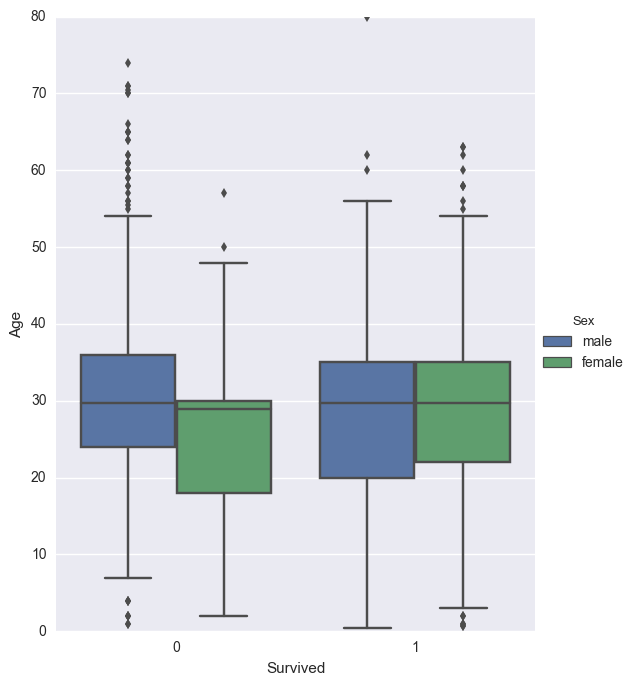

In [19]:
#Age
sns.factorplot(x="Survived", y="Age", hue='Sex', data=data_s, kind="box", size=7, aspect=.8)
# survive_A=data.groupby(['Sex','Age'])

From the above boxplot and calculated mean:
- Irrespective of sex and class, **age was not** a deciding factor in the passenger survival rate
- Average age for surived and not survived seemed almost same from the boxplot

,Survived,Pclass,Age,SibSp,Parch
group_age,,,,,
Adult,0.365079,2.288360,31.729820,0.394180,0.284392
Child,0.539823,2.584071,9.041327,1.460177,1.053097
Senior,0.227273,1.590909,66.022727,0.136364,0.272727


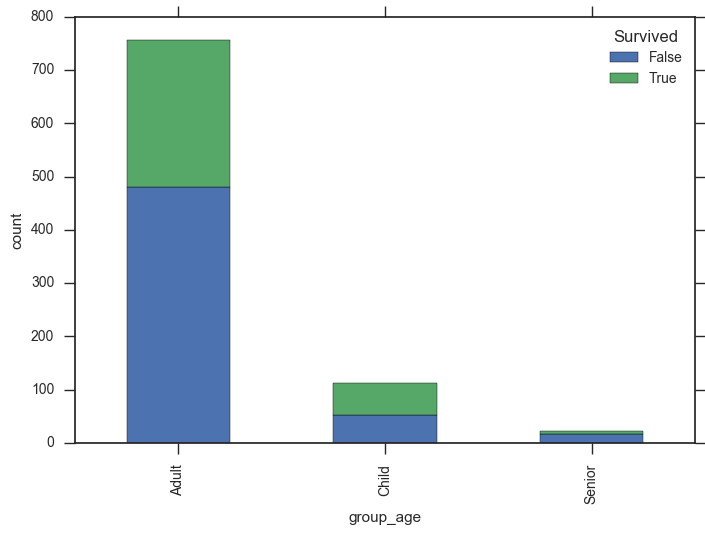

In [45]:
#Age
def grouping(age):
    if age < 18:
        return 'Child'
    elif age > 60: 
        return 'Senior'
    else:
        return 'Adult'

data['group_age'] = data['Age'].apply(grouping)    
survive_a=data.groupby(['group_age'])
survival_a = pd.crosstab([data.group_age], data_s.Survived.astype(bool))
survival_a.plot(kind='bar', stacked=True)
plt.ylabel("count")

# sns.factorplot(x="group_age", y="Age", hue='Sex', data=data, kind="box", size=7, aspect=.8)

survive_a.mean()

These are percentage of survivors for Group_age
- Adult : **36.5%**
- Child	: **53.9%**
- Senior: **22.72%**

### Women and children have preference First to lifeboats?

In [21]:
def group(d,v):
    if (d == 'female') and (v >= 18):
        return 'Woman'
    elif v < 18:
        return 'child'                        
    elif (d == 'male') and (v >= 18): 
        return  'Man'

data['Category'] = data.apply(lambda row:group(row['Sex'], row['Age']), axis=1) 
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,group_age,Category
0,0,3,male,22.0,1,0,Adult,Man
1,1,1,female,38.0,1,0,Adult,Woman
2,1,3,female,26.0,0,0,Adult,Woman
3,1,1,female,35.0,1,0,Adult,Woman
4,0,3,male,35.0,0,0,Adult,Man


Category
Man      0.165703
Woman    0.752896
child    0.539823
Name: Survived, dtype: float64

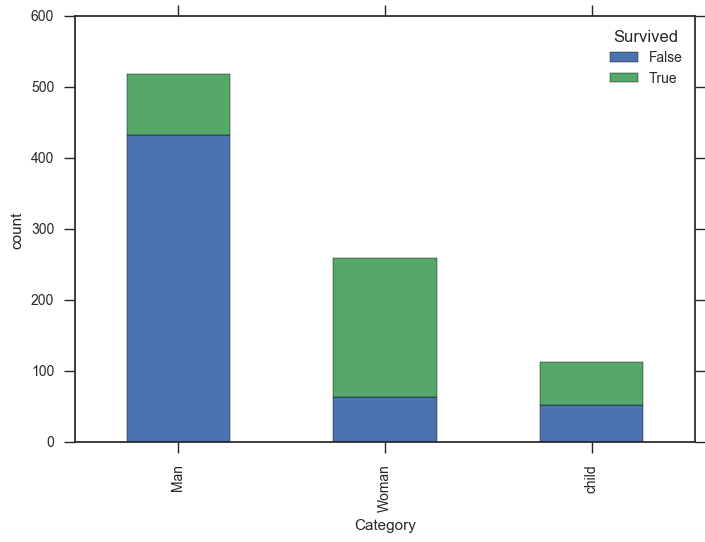

In [49]:
survival_a = pd.crosstab([data.Category], data_s.Survived.astype(bool))
survival_a.plot(kind='bar', stacked=True)
plt.ylabel("count")

data.groupby(['Category']).mean()["Survived"]

Women and children are given importance in the survival of a number of people. 

- Man 16.57%
- Women 75.2%
- Child 54%

C:\Users\SAI\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Category  Pclass
Man       2         0.082474
          3         0.121711
          1         0.347458
child     3         0.371795
Woman     3         0.486239
          2         0.906250
child     2         0.913043
          1         0.916667
Woman     1         0.976744
Name: Survived, dtype: float64

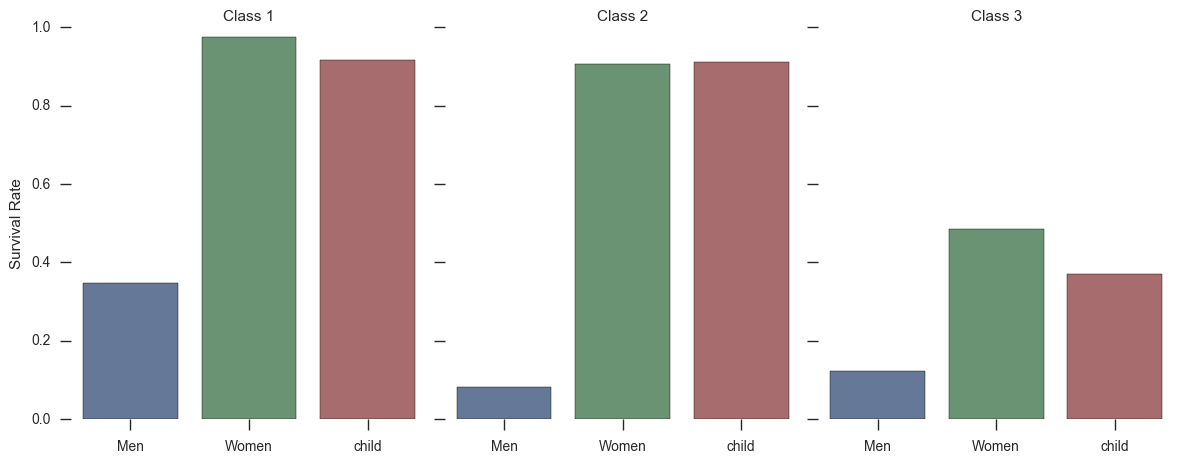

In [82]:
g = sns.factorplot(x="Category", y="Survived", col="Pclass", data=data, 
                   saturation=.5, kind="bar", ci=None, size=5, aspect=.8)

# Fix up the labels
(g.set_axis_labels('', 'Survival Rate')
     .set_xticklabels(["Men", "Women","child"])
     .set_titles("Class {col_name}")
     .set(ylim=(0, 1))
     .despine(left=True, bottom=True))
data_C=data.groupby(['Category',"Pclass"]).mean()
data_C.sort("Survived")["Survived"]

From the above values we can see that the survival rate is increasing from top to bottom. 
And the from the plot we can see the distribution of survival rate among men ,women and children,based on class.


## Conclusion


We observe a order of survival rate based on Age ,Sex and Class:

|children and women of upper class| 
|-----------------------------|
|children and women of middle class| 
|women of lower class|
|children of lower class |
|men of upper class|
| finally men of the  middle class and lower class have least survival rate|

The analysis seems that , A female with upper social-economic standing (first class) and Children,had the best chance of survival. Age did not seem to be a major factor.Man in third class, had the lowest chance of survival. Women and children of all classes, were mostly having a higher survival rate than men in general. 

**Limitations:**
- Part men and women were missing Age data and were replaced with mean as calculations which could have skewed.


## References

- https://www.kaggle.com/c/titanic/data
- http://nbviewer.jupyter.org/gist/fonnesbeck/5850463
- https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html#seaborn.factorplot
- http://seaborn.pydata.org/index.html